Kaggle dataset: https://www.kaggle.com/shivam2503/diamonds

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score, silhouette_score
import umap
import warnings

# Display preferences
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns', 100)

In [2]:
# Create dataframe
diamonds = pd.read_csv('../data/diamonds.csv')

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
# Drop Unnamed
diamonds = diamonds.drop(['Unnamed: 0'], axis=1)

In [5]:
# One-hot encoding
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], drop_first=True)], axis=1)

In [6]:
# Remove categorical variables
diamonds = diamonds.drop(['cut', 'color', 'clarity'], axis=1)

In [7]:
diamonds.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


When I started working through the clustering algorithms I was using the entire dataset (53,940 records), but in some cases the algorithms were taking very long to process / complete so I decided to limit independent and dependent variables to the first 20,000 records.

In [8]:
# Independent and dependent variables
X = diamonds[:20000]

In [9]:
# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Clustering 

I'll be comparing K-Means, Hierarchical, DBSCAN and Gaussian Mixture Models clustering algorithms.

In [10]:
# Function for metrics
def score(X_standard, y_predictions):
    print('Silhouette Score is {}'.format(silhouette_score(X_standard, y_predictions, metric='euclidean')))

### K-Means 

In [11]:
clusters = range(2, 21)

for cluster in clusters:
    
    # Number of clusters
    print('Number of clusters: {}'.format(str(cluster)))
    
    # Define KMeans
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)

    # Fit model
    kmeans_cluster.fit(X_std)

    # Predictions
    kmeans_predictions = kmeans_cluster.predict(X_std)
    
    # Metrics
    score(X_std, kmeans_predictions)

Number of clusters: 2
Silhouette Score is 0.18533042859426155
Number of clusters: 3
Silhouette Score is 0.09888204622646787
Number of clusters: 4
Silhouette Score is 0.12085758495214904
Number of clusters: 5
Silhouette Score is 0.12806548496896272
Number of clusters: 6
Silhouette Score is 0.1517648123070153
Number of clusters: 7
Silhouette Score is 0.15335421035128816
Number of clusters: 8
Silhouette Score is 0.16573088046620632
Number of clusters: 9
Silhouette Score is 0.16482538419817647
Number of clusters: 10
Silhouette Score is 0.1600430542372355
Number of clusters: 11
Silhouette Score is 0.15658132217602896
Number of clusters: 12
Silhouette Score is 0.15612455078019355
Number of clusters: 13
Silhouette Score is 0.15765909637092218
Number of clusters: 14
Silhouette Score is 0.1631031076469796
Number of clusters: 15
Silhouette Score is 0.1544533843101049
Number of clusters: 16
Silhouette Score is 0.15295152028081943
Number of clusters: 17
Silhouette Score is 0.16280832969508988
Numb

From the K-Means cluster comparison above, 11 clusters produced the highest Silhouette score of 0.1853.

In [12]:
# Define KMeans
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
kmeans_cluster.fit(X_std)

# Predictions
kmeans_predictions = kmeans_cluster.predict(X_std)

# Metrics
score(X_std, kmeans_predictions)

Silhouette Score is 0.18533042859426155


### Hierarchical 

In [13]:
# Agglomerative clustering (complete)
complete_cluster_cosine = AgglomerativeClustering(linkage='complete', affinity='cosine')

# Fit and predictions
complete_predictions_cosine = complete_cluster_cosine.fit_predict(X_std)

In [14]:
score(X_std, complete_predictions_cosine)

Silhouette Score is 0.07361005529731478


In [15]:
# Agglomerative clustering (complete)
complete_cluster_manhattan = AgglomerativeClustering(linkage='complete', affinity='manhattan')

# Fit and predictions
complete_predictions_manhattan = complete_cluster_manhattan.fit_predict(X_std)

In [16]:
score(X_std, complete_predictions_manhattan)

Silhouette Score is 0.2556683190669608


In [17]:
# Agglomerative clustering (ward)
ward_cluster = AgglomerativeClustering(linkage='ward', affinity='euclidean')

# Fit and predictions
ward_predictions = ward_cluster.fit_predict(X_std)

In [18]:
score(X_std, ward_predictions)

Silhouette Score is 0.2742538939223707


In [19]:
# Agglomerative clustering (average)
average_cluster_cosine = AgglomerativeClustering(linkage='average', affinity='cosine')

# Fit and predictions
average_predictions_cosine = average_cluster_cosine.fit_predict(X_std)

In [20]:
score(X_std, average_predictions_cosine)

Silhouette Score is 0.17415242795140976


In [21]:
# Agglomerative clustering (average)
average_cluster_manhattan = AgglomerativeClustering(linkage='average', affinity='manhattan')

# Fit and predictions
average_predictions_manhattan = average_cluster_manhattan.fit_predict(X_std)

In [22]:
score(X_std, average_predictions_manhattan)

Silhouette Score is 0.5718978532169066


When comparing the above hierarchical clustering algorithms, I think ward linkage and average linkage with manhattan distance produce the best results in terms of Silhouette score.

### DBSCAN 

In [23]:
samples = range(1, 12)

for sample in samples:
    
    # Number of samples
    print('Number of samples: {}'.format(str(sample)))

    # Define DBSCAN
    dbscan_cluster = DBSCAN(eps=1, min_samples=sample)

    # Fit and predictions
    dbscan_predictions = dbscan_cluster.fit_predict(X_std)
    
    score(X_std, dbscan_predictions)

Number of samples: 1
Silhouette Score is 0.2000198840057499
Number of samples: 2
Silhouette Score is 0.29541797385815793
Number of samples: 3
Silhouette Score is 0.31254865179604446
Number of samples: 4
Silhouette Score is 0.3114278923899489
Number of samples: 5
Silhouette Score is 0.3066674685451386
Number of samples: 6
Silhouette Score is 0.2934007329832134
Number of samples: 7
Silhouette Score is 0.2811453785058355
Number of samples: 8
Silhouette Score is 0.27085035989400685
Number of samples: 9
Silhouette Score is 0.25870546811782585
Number of samples: 10
Silhouette Score is 0.2446785433018415
Number of samples: 11
Silhouette Score is 0.2343367492949279


When comparing an epsilon of 1 and the number of minimum samples from the above DBSCAN analysis, 3 samples produces the best Silhouette score.

In [24]:
samples = range(1, 12)

for sample in samples:
    
    # Number of samples
    print('Number of samples: {}'.format(str(sample)))

    # Define DBSCAN
    dbscan_cluster = DBSCAN(eps=2, min_samples=sample)

    # Fit and predictions
    dbscan_predictions = dbscan_cluster.fit_predict(X_std)
    
    score(X_std, dbscan_predictions)

Number of samples: 1
Silhouette Score is 0.35780521840639556
Number of samples: 2
Silhouette Score is 0.3861800328537226
Number of samples: 3
Silhouette Score is 0.3902401637302787
Number of samples: 4
Silhouette Score is 0.3843245990446451
Number of samples: 5
Silhouette Score is 0.38168696502618293
Number of samples: 6
Silhouette Score is 0.37754565805474055
Number of samples: 7
Silhouette Score is 0.37079583106450875
Number of samples: 8
Silhouette Score is 0.36513359911443133
Number of samples: 9
Silhouette Score is 0.3617702802033768
Number of samples: 10
Silhouette Score is 0.355178845699785
Number of samples: 11
Silhouette Score is 0.34886131390955394


When comparing an epsilon of 2 and the number of minimum samples from the above DBSCAN analysis, 3 samples produces the best Silhouette score.

In [25]:
# Define DBSCAN
dbscan_cluster = DBSCAN(eps=2, min_samples=3)

# Fit and predictions
dbscan_predictions = dbscan_cluster.fit_predict(X_std)

score(X_std, dbscan_predictions)

Silhouette Score is 0.3902401637302787


### GMM 

In [30]:
components = range(2, 16)

for component in components:
    
    # Number of components
    print('Number of components: {}'.format(str(component)))

    # Define GMM
    gmm_cluster = GaussianMixture(n_components=component, random_state=123)

    # Fit and predictions
    gmm_predictions = gmm_cluster.fit_predict(X_std)
    
    score(X_std, gmm_predictions)

Number of components: 2
Silhouette Score is 0.24563346867064914
Number of components: 3
Silhouette Score is 0.08848345321003197
Number of components: 4
Silhouette Score is 0.11132221973652345
Number of components: 5
Silhouette Score is 0.09272996308049364
Number of components: 6
Silhouette Score is 0.08364839797085886
Number of components: 7
Silhouette Score is 0.10813583545151857
Number of components: 8
Silhouette Score is 0.1301149055215639
Number of components: 9
Silhouette Score is 0.13762567779179696
Number of components: 10
Silhouette Score is 0.13205487809719463
Number of components: 11
Silhouette Score is 0.12752094939201503
Number of components: 12
Silhouette Score is 0.10199788600342045
Number of components: 13
Silhouette Score is 0.12398639515704506
Number of components: 14
Silhouette Score is 0.13652916080802469
Number of components: 15
Silhouette Score is 0.14149535999588753


When comparing the number of components for Gaussian Mixture Models, 15 components produces the best Silhouette score.

In [31]:
# Define GMM
gmm_cluster = GaussianMixture(n_components=15, random_state=123)

# Fit and predictions
gmm_predictions = gmm_cluster.fit_predict(X_std)

score(X_std, gmm_predictions)

Silhouette Score is 0.14149535999588753


## Dimensionality Reduction 

I'll be comparing PCA, t-SNE and UMAP dimensionality reduction techniques.

### PCA 

In [32]:
# Define PCA
pca = PCA(n_components=2)

# Retrieve components by calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

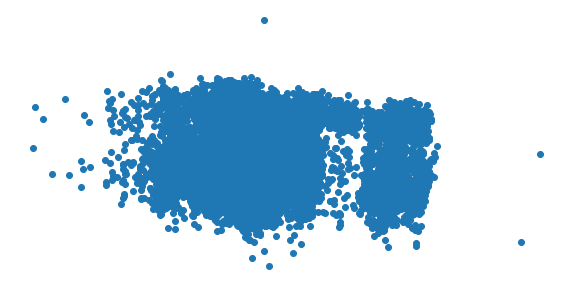

In [33]:
# Plot visual
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In the above visualization, PCA seems to indicate two classes, but it is still very unclear.

### t-SNE 

Number of iteration: 250
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.080s...
[t-SNE] Computed neighbors for 20000 samples in 16.981s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

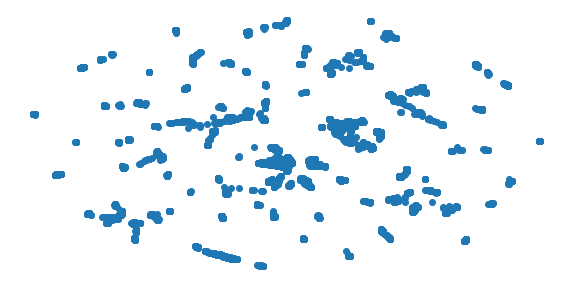

Number of iteration: 300
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.080s...
[t-SNE] Computed neighbors for 20000 samples in 16.831s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

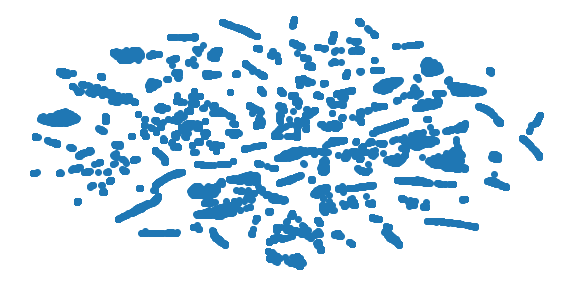

Number of iteration: 350
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.080s...
[t-SNE] Computed neighbors for 20000 samples in 19.770s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

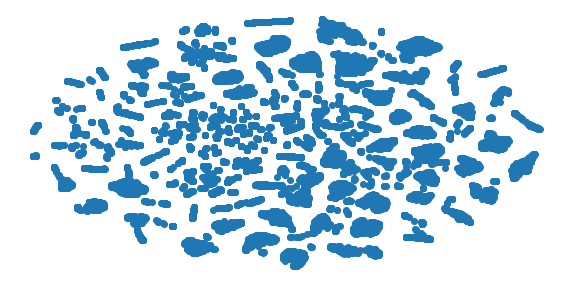

Number of iteration: 400
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.080s...
[t-SNE] Computed neighbors for 20000 samples in 16.276s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

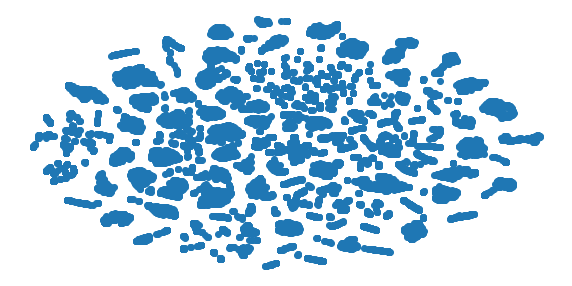

In [34]:
iterations = [250, 300, 350, 400]

for iteration in iterations:
    
    # Number of iterations
    print('Number of iteration: {}'.format(str(iteration)))

    # Define t-SNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=iteration)

    # Retrieve components
    tsne_results = tsne.fit_transform(X_std)
    
    # Plot visual
    plt.figure(figsize=(10,5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

I think 350 and 400 iterations produce the best data visualizations. In helping determine the best perplexity below, I am going to use 400 iterations.

Number of perplexity: 40
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.078s...
[t-SNE] Computed neighbors for 20000 samples in 16.023s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

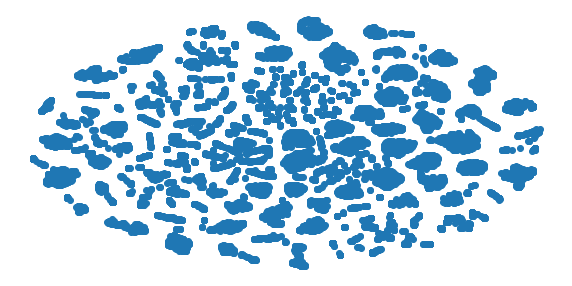

Number of perplexity: 50
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.082s...
[t-SNE] Computed neighbors for 20000 samples in 17.520s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

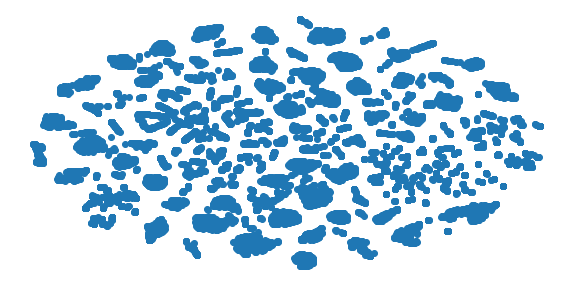

Number of perplexity: 60
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.085s...
[t-SNE] Computed neighbors for 20000 samples in 21.201s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

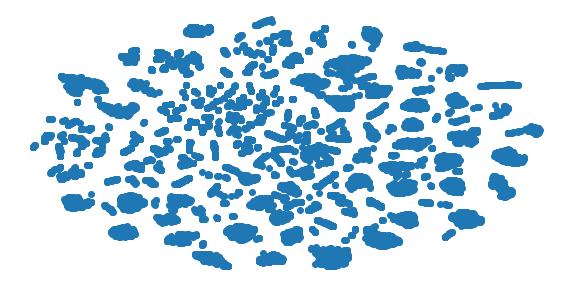

Number of perplexity: 70
[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.071s...
[t-SNE] Computed neighbors for 20000 samples in 19.775s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

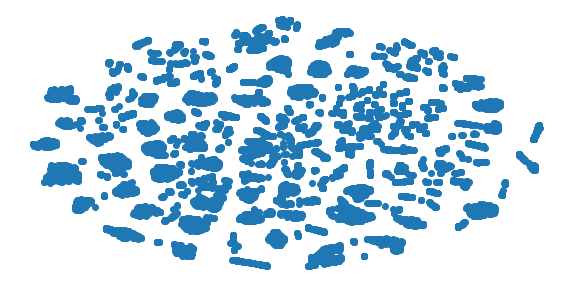

Number of perplexity: 80
[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.078s...
[t-SNE] Computed neighbors for 20000 samples in 19.552s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

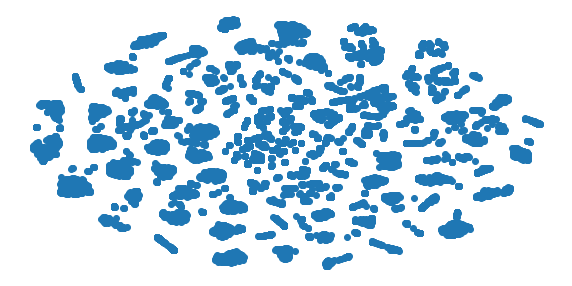

In [35]:
perplexities = [40, 50, 60, 70, 80]

for perplexity in perplexities:
    
    # Number of perplexity
    print('Number of perplexity: {}'.format(str(perplexity)))

    # Define t-SNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=400)

    # Retrieve components
    tsne_results = tsne.fit_transform(X_std)
    
    # Plot visual
    plt.figure(figsize=(10,5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

While reviewing the different perplexities, I think they all produce very similar data visualizations. However, I think the combination of 40 for perplexity and 400 for iterations produces the best result.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.078s...
[t-SNE] Computed neighbors for 20000 samples in 17.264s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for s

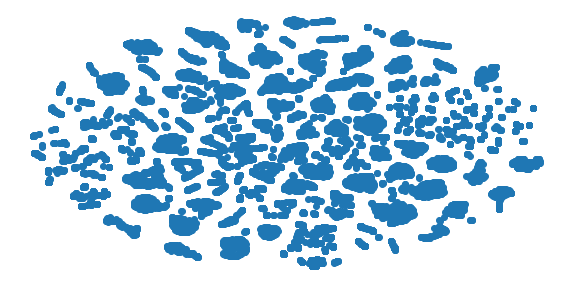

In [36]:
# Define t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=400)

# Retrieve components
tsne_results = tsne.fit_transform(X_std)
    
# Plot visual
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### UMAP 

Number of neighbors: 3


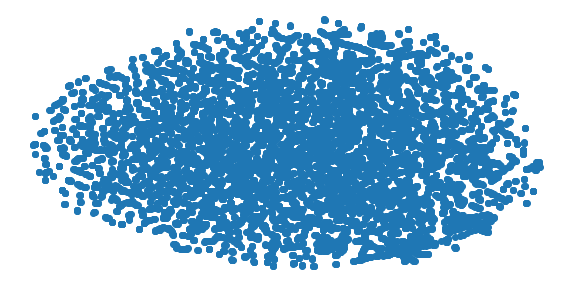

Number of neighbors: 4


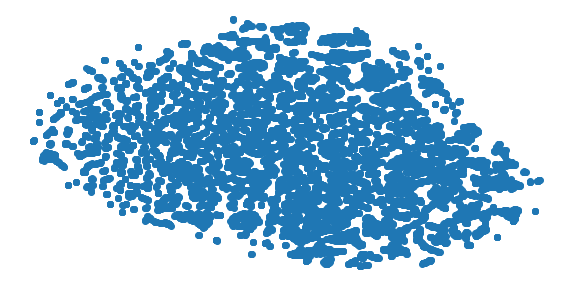

Number of neighbors: 5


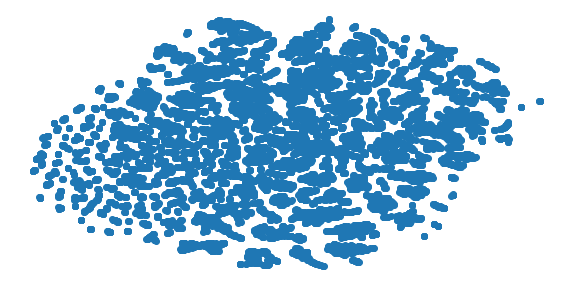

Number of neighbors: 6


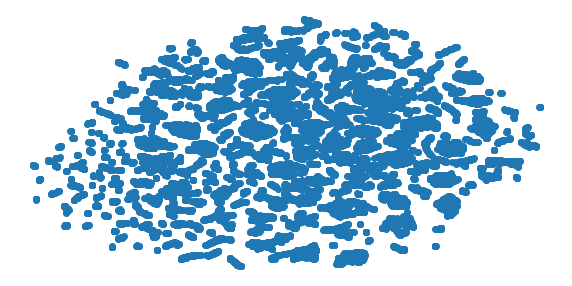

Number of neighbors: 7


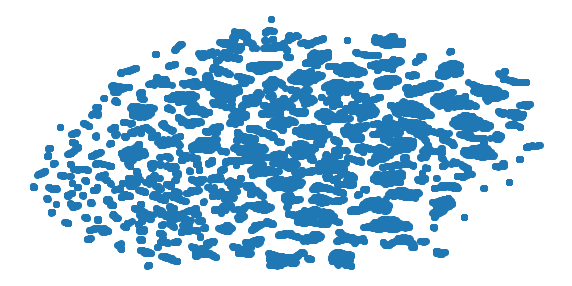

Number of neighbors: 8


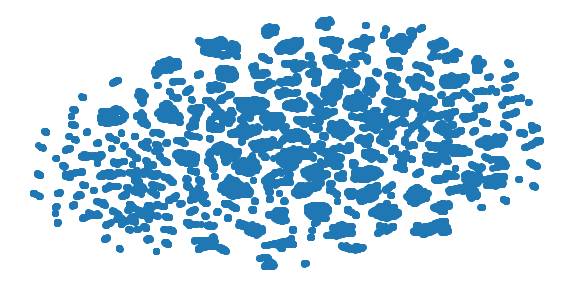

Number of neighbors: 9


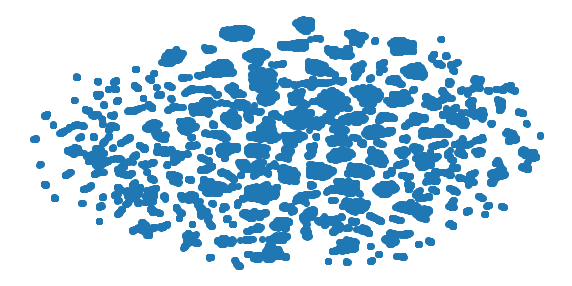

Number of neighbors: 10


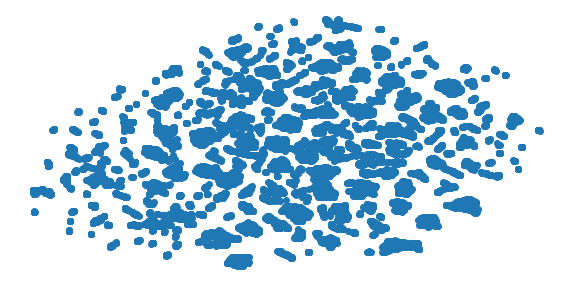

In [37]:
neighbors = [3, 4, 5, 6, 7, 8, 9, 10]

for neighbor in neighbors:
    
    # Number of neighbors
    print('Number of neighbors: {}'.format(str(neighbor)))

    # Define UMAP
    umap_results = umap.UMAP(n_neighbors=neighbor,
                             min_dist=0.3,
                             metric='correlation').fit_transform(X_std)
    
    # Plot visual
    plt.figure(figsize=(10,5))
    plt.scatter(umap_results[:, 0], umap_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

As for UMAP, I think using 10 for n_neighbors produces the best data visualization.

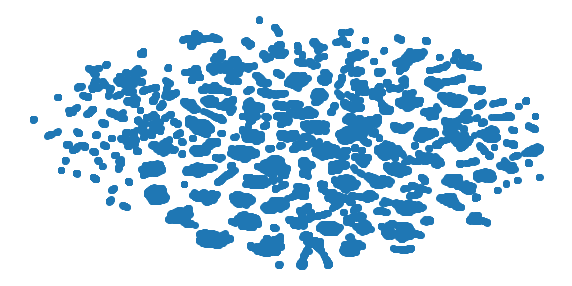

In [38]:
# Define UMAP
umap_results = umap.UMAP(n_neighbors=10,
                         min_dist=0.3,
                         metric='correlation').fit_transform(X_std)
    
# Plot visual
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Conclusion 

When comparing K-Means, Hierarchical, DBSCAN and GMM clustering algorithms, I think hierarchical and DBSCAN produces the best result overall.

When comparing PCA, t-SNE and UMAP dimensionality reduction techniques, I think UMAP produces the best data visualization for the diamonds dataset.